# R5.A.04
## TP 1


### **Exercice 1** : Recherche naïve et dichotomique (binaire) dans une liste de nombres

Taille 100000 : Naïve 3ms | Binaire 0.00195ms
Taille 500000 : Naïve 16ms | Binaire 0.00215ms
Taille 750000 : Naïve 24ms | Binaire 0.00245ms
Taille 1000000 : Naïve 33ms | Binaire 0.00233ms
Taille 5000000 : Naïve 160ms | Binaire 0.00284ms
Taille 7500000 : Naïve 243ms | Binaire 0.00284ms
Taille 10000000 : Naïve 336ms | Binaire 0.00300ms
Taille 50000000 : Naïve 1s, 602ms | Binaire 0.00317ms
Taille 75000000 : Naïve 2s, 518ms | Binaire 0.00341ms
Taille 100000000 : Naïve 3s, 243ms | Binaire 0.00326ms


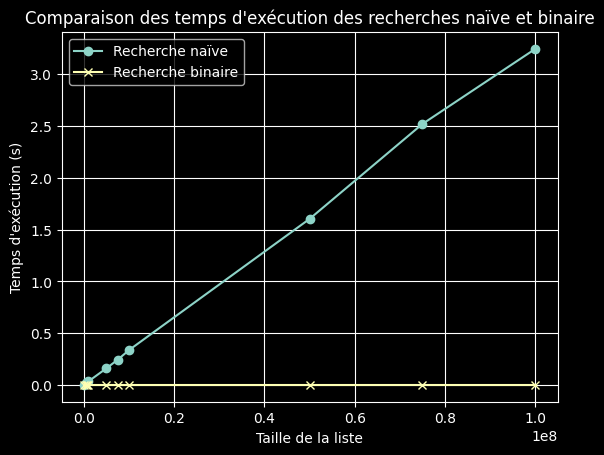

In [16]:
import time
import random
import matplotlib.pyplot as plt

# Génération de la liste initiale
def generate_list(size):
    return [i % 100000 for i in range(size)]

# Recherche naïve
def naive_search(lst, target):
    for i in range(len(lst)):
        if lst[i] == target:
            return i
    return -1

# Recherche dichotomique (binaire)
def binary_search(lst, target):
    left, right = 0, len(lst) - 1
    while left <= right:
        mid = (left + right) // 2
        if lst[mid] == target:
            return mid
        elif lst[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Fonction de mesure du temps d'exécution
def measure_time_search(search_function, lst, target, iterations=10):
    total_time = 0
    for _ in range(iterations):
        start_time = time.perf_counter()
        search_function(lst, target)
        total_time += (time.perf_counter() - start_time) * 1000  # ms
    return total_time / iterations

# Fonction de formatage du temps
def TimeFormatter(milliseconds: float) -> str:
    if milliseconds < 1:
        return f"{milliseconds:.5f}ms"
    
    seconds, milliseconds = divmod(int(milliseconds), 1000)
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    days, hours = divmod(hours, 24)
    tmp = (
        ((str(days) + "d, ") if days else '')
        + ((str(hours) + "h, ") if hours else '')
        + ((str(minutes) + "m, ") if minutes else '')
        + ((str(seconds) + "s, ") if seconds else '')
        + ((str(milliseconds) + "ms, ") if milliseconds else '')
    )
    return tmp[:-2]

# Paramètres de test
sizes = [100000, 500000, 750000, 1000000, 5000000, 7500000, 10000000, 50000000, 75000000, 100000000]
target = -1  # Nombre à rechercher (n'existe pas)

# Mesure des temps pour chaque taille de liste
naive_times = []
binary_times = []

for size in sizes:
    lst = generate_list(size)
    
    # Mesure pour la recherche naïve
    naive_time = measure_time_search(naive_search, lst, target, iterations=10)
    naive_times.append(naive_time)
    
    # Tri de la liste pour la recherche binaire
    lst.sort()
    
    # Mesure pour la recherche dichotomique
    binary_time = measure_time_search(binary_search, lst, target, iterations=1000)
    binary_times.append(binary_time)
    
    print(f"Taille {size} : Naïve {TimeFormatter(naive_time)} | Binaire {TimeFormatter(binary_time)}")

naive_times_plot = [x / 1000 for x in naive_times]
binary_times_plot = [x / 1000 for x in binary_times]

# Affichage des résultats
plt.plot(sizes, naive_times_plot, label="Recherche naïve", marker='o')
plt.plot(sizes, binary_times_plot, label="Recherche binaire", marker='x')
plt.xlabel("Taille de la liste")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution des recherches naïve et binaire")
plt.legend()
plt.grid(True)
plt.show()


### **Exercice 2** : Comparaison de deux algorithmes de tri

Taille 1000: Insertion 0.15850ms | QuickSort 1ms
Taille 5000: Insertion 0.81420ms | QuickSort 9ms
Taille 10000: Insertion 1ms | QuickSort 15ms
Taille 50000: Insertion 6ms | QuickSort 92ms
Taille 100000: Insertion 11ms | QuickSort 169ms


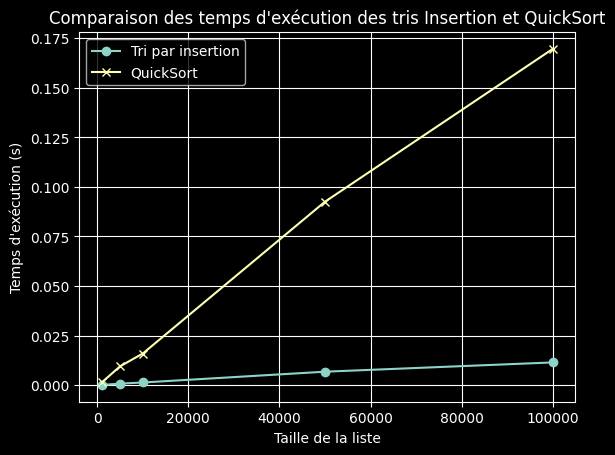

In [20]:
# Tri par insertion
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Tri rapide (QuickSort)
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Fonction pour mesurer le temps d'exécution
def measure_sort_time(sort_function, arr, iterations=10):
    total_time = 0
    for _ in range(iterations):
        arr_copy = arr.copy()
        start_time = time.perf_counter()
        sort_function(arr_copy)
        total_time += (time.perf_counter() - start_time) * 1000  # ms
    return total_time / iterations

# Comparaison des temps pour les deux algorithmes
sizes = [1000, 5000, 10000, 50000, 100000]
insertion_times = []
quick_sort_times = []

for size in sizes:
    lst = generate_list(size)
    
    # Mesure pour le tri par insertion
    insertion_time = measure_sort_time(insertion_sort, lst)
    insertion_times.append(insertion_time)
    
    # Mesure pour le tri rapide
    quick_sort_time = measure_sort_time(quick_sort, lst)
    quick_sort_times.append(quick_sort_time)
    
    print(f"Taille {size}: Insertion {TimeFormatter(insertion_time)} | QuickSort {TimeFormatter(quick_sort_time)}")

insertion_times_plot = [x / 1000 for x in insertion_times]
quick_sort_times_plot = [x / 1000 for x in quick_sort_times]

# Affichage des résultats
plt.plot(sizes, insertion_times_plot, label="Tri par insertion", marker='o')
plt.plot(sizes, quick_sort_times_plot, label="QuickSort", marker='x')
plt.xlabel("Taille de la liste")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution des tris Insertion et QuickSort")
plt.legend()
plt.grid(True)
plt.show()


### **rust** : `main.rs`

```rust
use rand::Rng;
use std::time::Instant;

// Tri par insertion
fn insertion_sort(arr: &mut [i32]) {
    let len = arr.len();
    for i in 1..len {
        let key = arr[i];
        let mut j = i as isize - 1;
        while j >= 0 && arr[j as usize] > key {
            arr[j as usize + 1] = arr[j as usize];
            j -= 1;
        }
        arr[j as usize + 1] = key;
    }
}

// QuickSort
fn quick_sort(arr: &mut [i32]) {
    if arr.len() <= 1 {
        return;
    }

    let pivot = arr[arr.len() / 2];
    let mut left: Vec<i32> = Vec::new();
    let mut middle: Vec<i32> = Vec::new();
    let mut right: Vec<i32> = Vec::new();

    // Diviser les éléments en trois sous-groupes : gauche, milieu (pivot), droite
    for i in arr.iter() {
        if *i < pivot {
            left.push(*i);
        } else if *i == pivot {
            middle.push(*i);
        } else {
            right.push(*i);
        }
    }

    // Trier récursivement les sous-groupes
    quick_sort(&mut left);
    quick_sort(&mut right);

    // Combiner les sous-groupes
    arr[..left.len()].copy_from_slice(&left);
    arr[left.len()..left.len() + middle.len()].copy_from_slice(&middle);
    arr[left.len() + middle.len()..].copy_from_slice(&right);
}

// Fonction pour mesurer le temps d'exécution
fn measure_sort_time<F>(sort_function: F, arr: &mut [i32], iterations: usize) -> f64
where
    F: Fn(&mut [i32]),
{
    let mut total_time = 0.0;

    for _ in 0..iterations {
        let mut arr_copy = arr.to_vec();
        let start_time = Instant::now();
        sort_function(&mut arr_copy);
        total_time += start_time.elapsed().as_secs_f64();
    }

    total_time / iterations as f64
}

fn main() {
    let sizes = [1000, 5000, 10000, 50000, 100000];
    let iterations = 10;
    let mut rng = rand::thread_rng();

    for &size in &sizes {
        let mut arr: Vec<i32> = (0..size).map(|_| rng.gen_range(0..100000)).collect();

        // Mesure pour le tri par insertion
        let insertion_time = measure_sort_time(insertion_sort, &mut arr, iterations);
        println!("Taille {} : Tri par insertion {:.6}s", size, insertion_time);

        // Mesure pour QuickSort
        let quick_sort_time = measure_sort_time(quick_sort, &mut arr, iterations);
        println!("Taille {} : QuickSort {:.6}s", size, quick_sort_time);
    }
}
```

`Cargo.toml`
```toml
[package]
name = "comparaison_tris"
version = "0.1.0"
edition = "2021"

[dependencies]
rand = "0.8.5"
```

**Output**
```bash
cargo run --release
   Compiling comparaison_tris v0.1.0 (D:\EDM115\Documents\IUT\R5.A.04\comparaison_tris)
   Compiling comparaison_tris v0.1.0 (D:\EDM115\Documents\IUT\R5.A.04\comparaison_tris)
    Finished `release` profile [optimized] target(s) in 0.86s
     Running `target\release\comparaison_tris.exe`
     Running `target\release\comparaison_tris.exe`
Taille 1000 : Tri par insertion 0.000100s
Taille 1000 : Tri par insertion 0.000100s
Taille 1000 : QuickSort 0.000279s
Taille 5000 : Tri par insertion 0.002608s
Taille 5000 : QuickSort 0.001392s
Taille 10000 : Tri par insertion 0.009609s
Taille 10000 : QuickSort 0.002456s
Taille 50000 : Tri par insertion 0.238899s
Taille 50000 : QuickSort 0.011482s
Taille 100000 : Tri par insertion 0.957464s
Taille 100000 : QuickSort 0.021643s
```